In [1]:
import qiskit as q
from qiskit.tools.visualization import plot_bloch_multivector
from qiskit.visualization import plot_histogram
from qiskit.tools.monitor import job_monitor
from matplotlib import style
import math
from qiskit import IBMQ
#style.use("dark_background") # I am using dark mode notebook, so I use this to see the chart.
# to use dark mode:
# edited '/usr/local/lib/python3.7/dist-packages/qiskit/visualization/bloch.py line 177 self.font_color = 'white'
# edited '/usr/local/lib/python3.7/dist-packages/qiskit/visualization/counts_visualization.py line 206     ax.set_facecolor('#000000')
%matplotlib inline


def list_backends():
    provider = IBMQ.get_provider("ibm-q")
    for backend in provider.backends():
        try:
            qubit_count = len(backend.properties().qubits)
        except:
            qubit_count = "simulated"
        
        print(backend.name(), "has", backend.status().pending_jobs, "qued and", qubit_count, "qubits")

def run(b, circuit):
    provider = IBMQ.get_provider("ibm-q")
    backend = provider.get_backend(b)
    job = q.execute(circuit, backend=backend, shots=1000)
    job_monitor(job)
    return(job)


IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

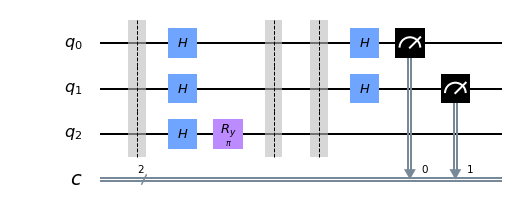

In [2]:
def balanced_black_box(c):
    c.cx(0,2)
    c.cx(1,2)
    return c
    
def constant_black_box(c):
    # outputs whatever you put in. 
    return c

c = q.QuantumCircuit(3,2)
c.barrier()
c.h(0)
c.h(1)
c.h(2)
c.ry(math.pi,2)  # changed c.x(2) to this.
c.barrier()
c = constant_black_box(c)
c.barrier()
c.h(0)
c.h(1)
c.measure([0,1],[0,1])
c.draw()

Job Status: job has successfully run


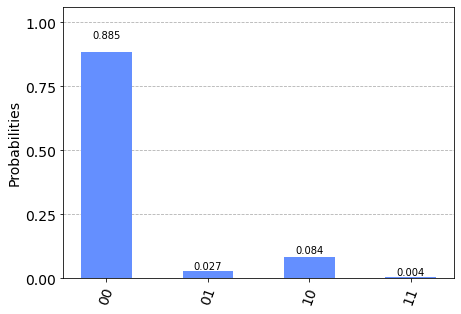

In [3]:
job = run("ibmqx2", c)

result = job.result()
counts = result.get_counts(c)
plot_histogram([counts])